### Sklearn uses CART algorithm for decision trees
node_split: 1. Classificaton - Based on Gini Impurity or Entropy
            2. Regression - Based on Mean Squared Error
pruning-Cost_complexity_Post pruning : adjust ccp_alpha parameter which in turn adjust max_leaf and max_depth Parameter
        pre-Pruning : adjust max_leaf and max_depth Parameter using hyper parameter tuning

In [1]:
import sklearn
sklearn.__version__

'0.24.2'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
df=pd.read_csv('cpp_cleaned_data')

In [4]:
x=df.drop(['price'],axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=30)

In [5]:
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)


DecisionTreeRegressor()

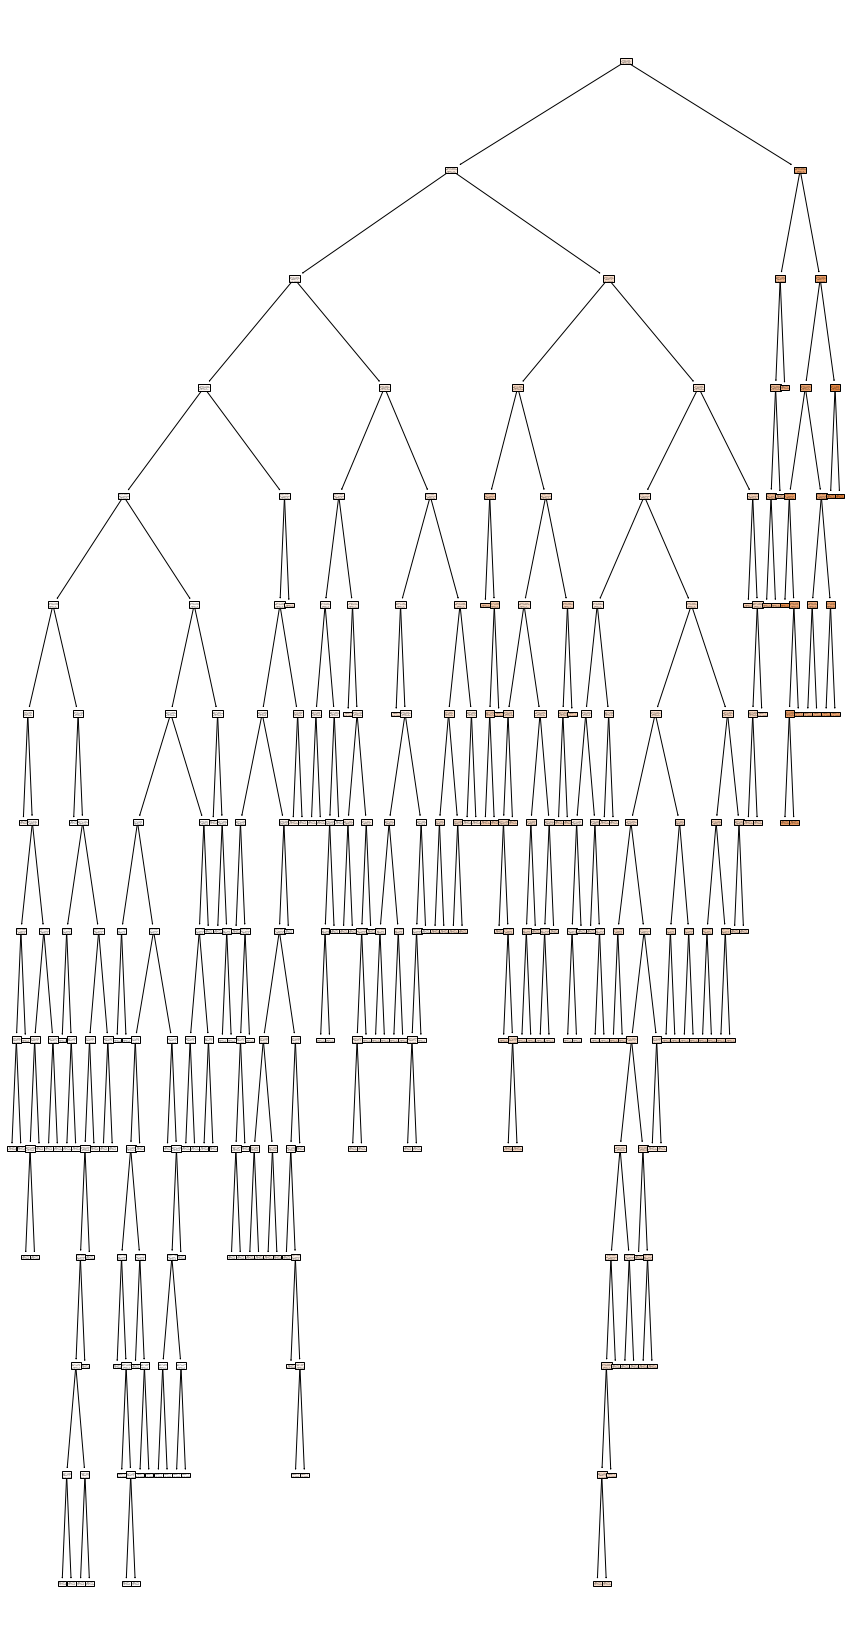

In [6]:
from sklearn import tree
plt.figure(figsize=(15,30))
tree.plot_tree(clf,filled=True)
plt.show()

In [7]:
pred=clf.predict(x_test)

In [8]:
#check the accuracy
print(f"score is :{clf.score(x_train,y_train)}")
print(f"score is :{clf.score(x_test,y_test)}")

score is :0.9994703222507074
score is :0.8119088318428673


In [9]:
print(f"predicted: {clf.predict([x_test.iloc[1,:]])}")
print(f"true: {y_test.iloc[1]}")

predicted: [11694.]
true: 10898.0


In [10]:
#check the accuracy of model
mse=mean_squared_error(y_test,pred)
rmse=mse**0.5
mae=mean_absolute_error(y_test,pred)
r2_sc=r2_score(y_test,pred)
print(f"mse: {mse}\nrmse: {rmse}\nmae: {mae}\nr2_score: {r2_sc}")

mse: 10385354.420731707
rmse: 3222.6315986677264
mae: 1964.4268292682927
r2_score: 0.8119088318428673


In [11]:
path=clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,path_impurities=path.ccp_alphas,path.impurities

In [12]:
ccp_alphas

array([0.00000000e+00, 3.04878049e-03, 3.68902439e-01, 3.68902439e-01,
       1.31707317e+00, 3.32012195e+00, 4.87804878e+00, 5.12500000e+00,
       6.45121951e+00, 8.89024390e+00, 1.09756098e+01, 1.58048780e+01,
       1.76097561e+01, 2.11463415e+01, 2.69390244e+01, 2.75152439e+01,
       3.23445122e+01, 4.03201220e+01, 4.35457317e+01, 5.55640244e+01,
       5.55640244e+01, 5.97560976e+01, 6.69024390e+01, 6.85975610e+01,
       6.95152439e+01, 7.41951220e+01, 7.90518293e+01, 8.73582317e+01,
       1.07756098e+02, 1.14731707e+02, 1.26878049e+02, 1.49821646e+02,
       1.75609756e+02, 1.92076220e+02, 2.44173780e+02, 2.54637195e+02,
       2.90879065e+02, 3.00597561e+02, 3.14162602e+02, 3.22190244e+02,
       3.24012195e+02, 3.44195122e+02, 3.73475610e+02, 4.40243902e+02,
       4.40243902e+02, 4.48983740e+02, 4.56199187e+02, 4.75685976e+02,
       5.73740854e+02, 6.55293699e+02, 6.73475610e+02, 7.35976626e+02,
       7.47027439e+02, 8.38098780e+02, 9.70737805e+02, 9.98049797e+02,
      

In [13]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeRegressor(ccp_alpha=ccp_alpha,random_state=30)
    clf.fit(x_train,y_train)
    clfs.append(clf)


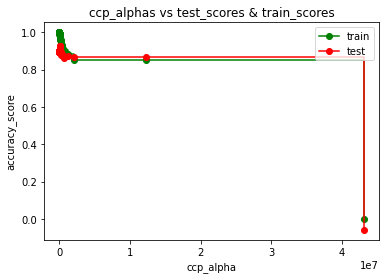

In [14]:
#check ccp_alphas vs test_scores & train_scores
train_scores=[clf.score(x_train,y_train) for clf in clfs]
test_scores=[clf.score(x_test,y_test) for clf in clfs]



fig,ax=plt.subplots()
ax.set_xlabel('ccp_alpha')
ax.set_ylabel('accuracy_score')
ax.set_title('ccp_alphas vs test_scores & train_scores')
ax.plot(ccp_alphas,train_scores,color='green', marker='o', drawstyle='steps-post',label='train')
ax.plot(ccp_alphas,test_scores,color='red', marker='o',drawstyle='steps-post',label='test' )
ax.legend()
plt.show()

In [15]:
clf1=DecisionTreeRegressor(ccp_alpha=0.5,random_state=30)
clf1.fit(x_train,y_train)
pred1=clf1.predict(x_test)

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,30))
tree.plot_tree(clf1,filled=True)
plt.show()

In [ ]:
#check the accuracy
print(f"score is :{clf1.score(x_train,y_train)}")
print(f"score is :{clf1.score(x_test,y_test)}")

In [ ]:
#check the accuracy of model
mse=mean_squared_error(y_test,pred1)
rmse=mse**0.5
mae=mean_absolute_error(y_test,pred1)
r2_sc=r2_score(y_test,pred1)
print(f"mse: {mse}\nrmse: {rmse}\nmae: {mae}\nr2_score: {r2_sc}")

In [ ]:
print(f"predicted: {clf1.predict([x_test.iloc[1,:]])}")
print(f"true: {y_test.iloc[1]}")

In [ ]:
import seaborn as sns
sns.distplot(y_test-pred1)

conclusion : There is no major difference comes out of post pruning model was giving accuracy before pruning also 
    and after pruning accuracy score slightly increase max_septh,leaf_size does not changed 